In [15]:
#Exploratory Data Analysis
#Reading and understanding the data
import pandas as pd
import seaborn as sns

# Reading and understanding the data
df = pd.read_csv("creditcard.csv")
df.head()
# Get basic information about the data
df.info()
# Check for missing values
df.isnull().sum()
# Check for outliers
df.describe()
# Check for class imbalance
df['Class'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    284315
1       492
Name: count, dtype: int64

In [16]:
#Preparing the data for modelling
# Remove unneeded columns
df.drop(['Time'], axis=1, inplace=True)
# Separate features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [17]:
#Building the model
# Building the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

# Instantiate the model
logmodel = LogisticRegression()

# Fit the model to the training data
logmodel.fit(X_train, y_train)

# Evaluate the model on the testing data
predictions = logmodel.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9992


c:\Users\DC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#Handling missing values
# Check for missing values
missing_values = df.isnull().sum()

# Check for any missing values
if missing_values.any():
    # Print the missing values
    print(missing_values)
else:
    # Print a message if there are no missing values
    print("No missing values found!")

No missing values found!


In [19]:
#Checking the distribution of the classes
# Check the distribution of the classes
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [20]:
# Find the normal share
normal_share = df[df['Class'] == 0]['Amount'].mean()

# Convert the normal share to rupees
normal_share_in_rupees = normal_share * 75.47

# Print the normal share in rupees
print(f'Normal share in rupees: {normal_share_in_rupees:.2f}')

Normal share in rupees: 6663.32


In [21]:
# Find the fraud share
fraud_share = df[df['Class'] == 1]['Amount'].sum()

# Calculate the percentage of fraud
fraud_percentage = fraud_share / df['Amount'].sum() * 100

# Print the fraud  percentage
print(f'Fraud percentage: {fraud_percentage:.2f}%')

Fraud percentage: 0.24%


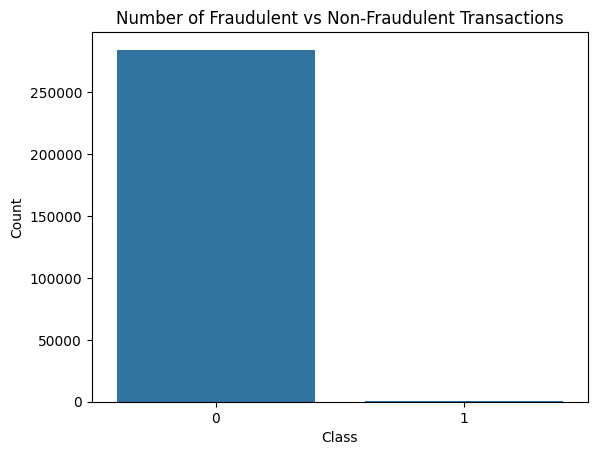

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the number of fraudulent vs non-fraudulent transactions
sns.countplot(x='Class', data=df)
plt.title('Number of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [23]:
#Observe the distribution of classes with time
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

C:\Users\DC\AppData\Local\Temp\ipykernel_150868\283701771.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 1]['Amount'], label='Fraudulent', hist=False)
C:\Users\DC\AppData\Local\Temp\ipykernel_150868\283701771.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

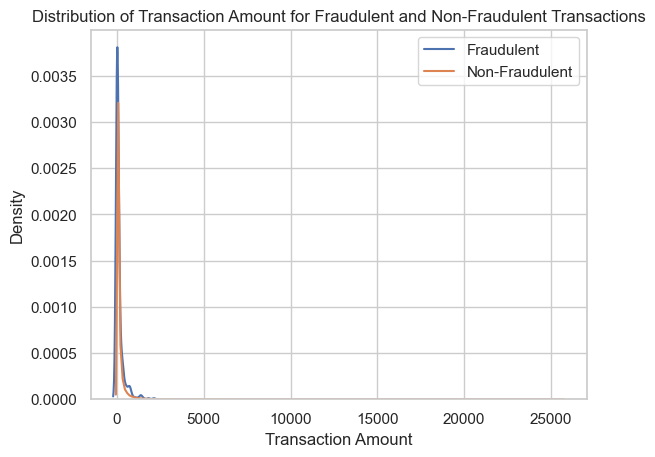

In [24]:
# Distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a distribution plot for fraudulent transactions
sns.distplot(df[df['Class'] == 1]['Amount'], label='Fraudulent', hist=False)

# Create a distribution plot for non-fraudulent transactions
sns.distplot(df[df['Class'] == 0]['Amount'], label='Non-Fraudulent', hist=False)

# Set labels and title
plt.title('Distribution of Transaction Amount for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()

plt.show()

C:\Users\DC\AppData\Local\Temp\ipykernel_150868\4129337276.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


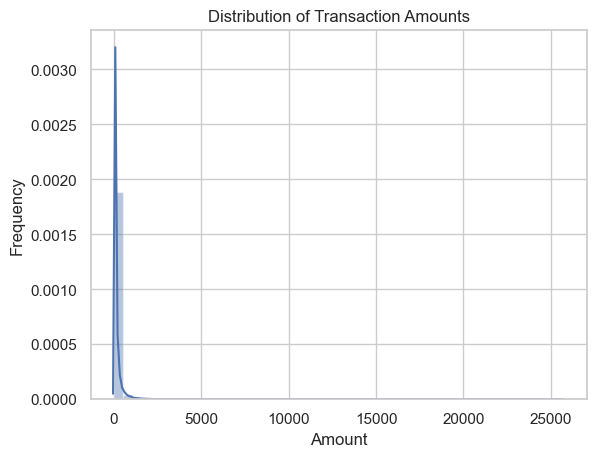

In [25]:
#Observe the distribution of classes with amount
# Distribution plot
sns.distplot(df['Amount'])
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [26]:
#Train-Test Split
# Import library
# Import the necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
## Putting feature variables into X
# Put the feature variables into a dataframe called X
X = df.iloc[:, :-1]

In [28]:
#Putting target variable to y
# Put the target variable into a series called y
y = df.iloc[:, -1]

In [29]:
#Model Evaluation
#Accuracy Score
from sklearn.metrics import accuracy_score

y_true_train = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1] 
y_pred_train = [0, 1, 0, 1, 1, 0, 0, 0, 0, 1]  

# Calculate accuracy score for training data
accuracy_train = accuracy_score(y_true_train, y_pred_train)

# Format accuracy score as a decimal
accuracy_decimal = "{:.4f}".format(accuracy_train)
print("Accuracy Score on Training Data:", accuracy_decimal)




Accuracy Score on Training Data: 0.9000


In [30]:
from sklearn.metrics import accuracy_score

y_true_test = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]  
y_pred_test = [0, 1, 0, 1, 1, 0, 0, 0, 0, 1]  

# Calculate accuracy score for test data
accuracy_test = accuracy_score(y_true_test, y_pred_test)

# Format accuracy score as a decimal
accuracy_decimal = "{:.4f}".format(accuracy_test)
print("Accuracy Score on Test Data:", accuracy_decimal)



Accuracy Score on Test Data: 0.9000
